In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
base_path = "/kaggle/input/plantdisease/PlantVillage"

images = []
label = []

folders = os.listdir(base_path)
# print(folders)

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    items = os.listdir(folder_path)

    for item in items:
        file = os.path.join(folder_path, item)
        images.append(file)
        label.append(folder)
        
        

In [3]:
data = pd.DataFrame({"file_paths" : images, "labels" : label})

In [4]:
data

,file_paths,labels
0,/kaggle/input/plantdisease/PlantVillage/Pepper...,Pepper__bell___Bacterial_spot
1,/kaggle/input/plantdisease/PlantVillage/Pepper...,Pepper__bell___Bacterial_spot
2,/kaggle/input/plantdisease/PlantVillage/Pepper...,Pepper__bell___Bacterial_spot
3,/kaggle/input/plantdisease/PlantVillage/Pepper...,Pepper__bell___Bacterial_spot
4,/kaggle/input/plantdisease/PlantVillage/Pepper...,Pepper__bell___Bacterial_spot
...,...,...
20634,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Tomato_mosaic_virus
20635,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Tomato_mosaic_virus
20636,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Tomato_mosaic_virus
20637,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Tomato_mosaic_virus


In [5]:
data.isnull().sum()

file_paths    0
labels        0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['labels'].unique()

array(['Pepper__bell___Bacterial_spot', 'Potato___healthy',
       'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot',
       'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato_Early_blight', 'Tomato__Target_Spot',
       'Pepper__bell___healthy', 'Potato___Late_blight',
       'Tomato_Late_blight', 'Potato___Early_blight',
       'Tomato__Tomato_mosaic_virus'], dtype=object)

In [8]:
data.shape

(20639, 2)

In [9]:
data = data.sample(frac=1).reset_index(drop=True)

In [10]:
data

,file_paths,labels
0,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Target_Spot
1,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato_Bacterial_spot
2,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato_Spider_mites_Two_spotted_spider_mite
3,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Tomato_YellowLeaf__Curl_Virus
4,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato_Spider_mites_Two_spotted_spider_mite
...,...,...
20634,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Target_Spot
20635,/kaggle/input/plantdisease/PlantVillage/Potato...,Potato___Late_blight
20636,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato__Tomato_YellowLeaf__Curl_Virus
20637,/kaggle/input/plantdisease/PlantVillage/Tomato...,Tomato_healthy


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

In [12]:
value_counts = data['labels'].value_counts()
value_counts

labels
Tomato__Tomato_YellowLeaf__Curl_Virus          3209
Tomato_Bacterial_spot                          2127
Tomato_Late_blight                             1909
Tomato_Septoria_leaf_spot                      1771
Tomato_Spider_mites_Two_spotted_spider_mite    1676
Tomato_healthy                                 1591
Pepper__bell___healthy                         1478
Tomato__Target_Spot                            1404
Tomato_Early_blight                            1000
Potato___Early_blight                          1000
Potato___Late_blight                           1000
Pepper__bell___Bacterial_spot                   997
Tomato_Leaf_Mold                                952
Tomato__Tomato_mosaic_virus                     373
Potato___healthy                                152
Name: count, dtype: int64

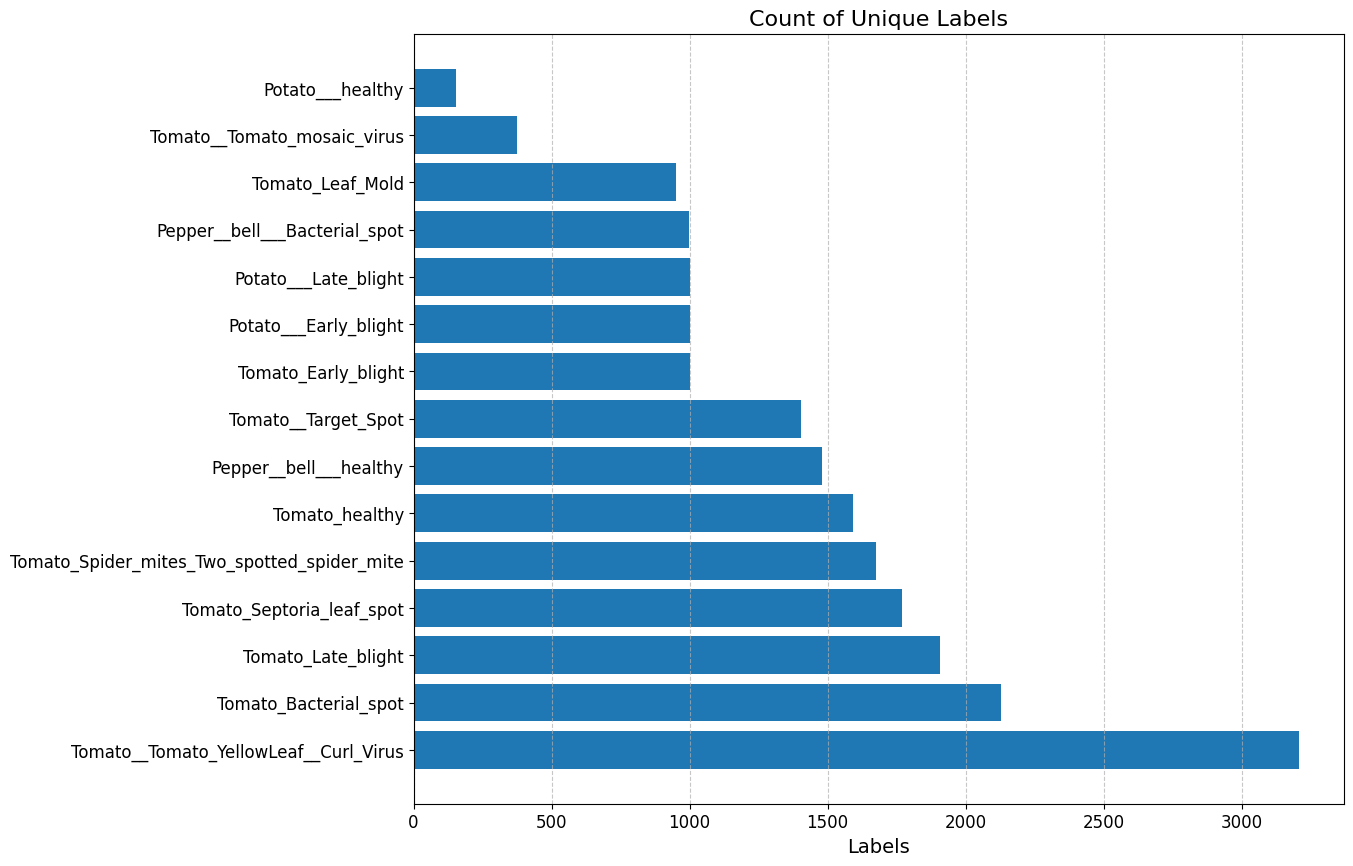

In [13]:
plt.figure(figsize=(12,10))
plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Labels', fontsize=14)

# plt.ylabel('Number of images', fontsize=14)

plt.title('Count of Unique Labels', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

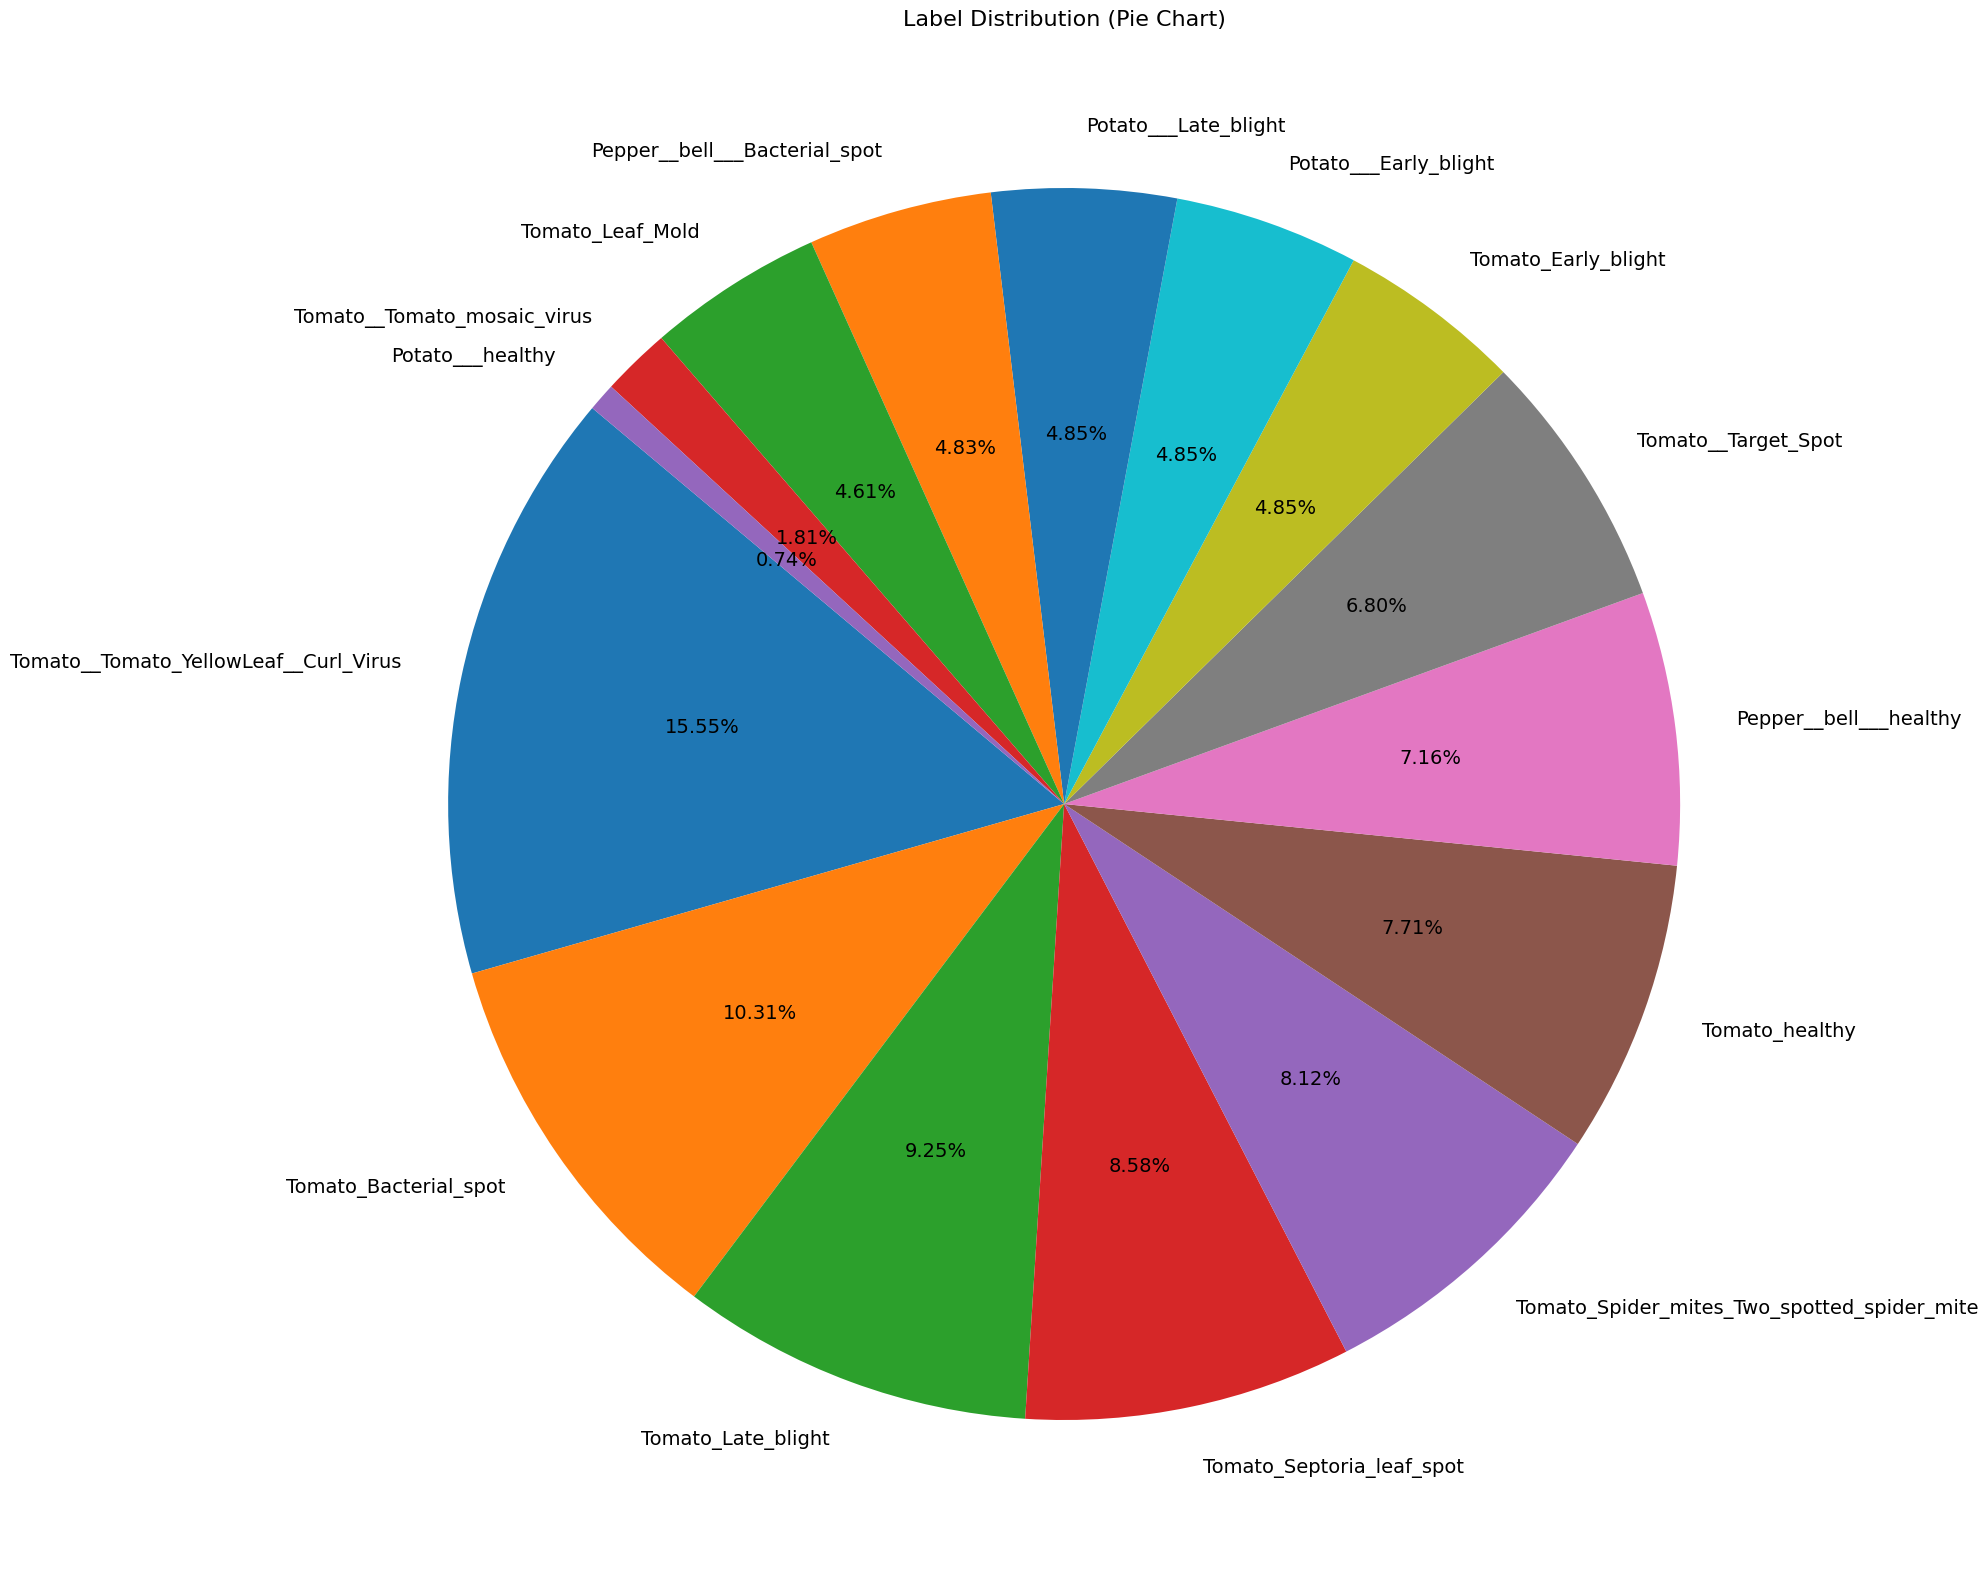

In [14]:
plt.figure(figsize=(20,20))
plt.pie(
    value_counts.values,
    labels=value_counts.index,
    autopct='%1.2f%%', 
    startangle=140,          # Rotate for better layout
    textprops={'fontsize': 14}
)

plt.title('Label Distribution (Pie Chart)', fontsize=16)

# plt.axis('equal')

plt.show()

In [15]:
import cv2

def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')
    plt.title('Image Preview')
    plt.show()

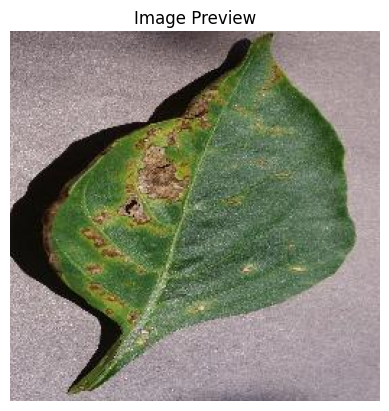

In [16]:
path1 = "/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG"
load_image(path1)

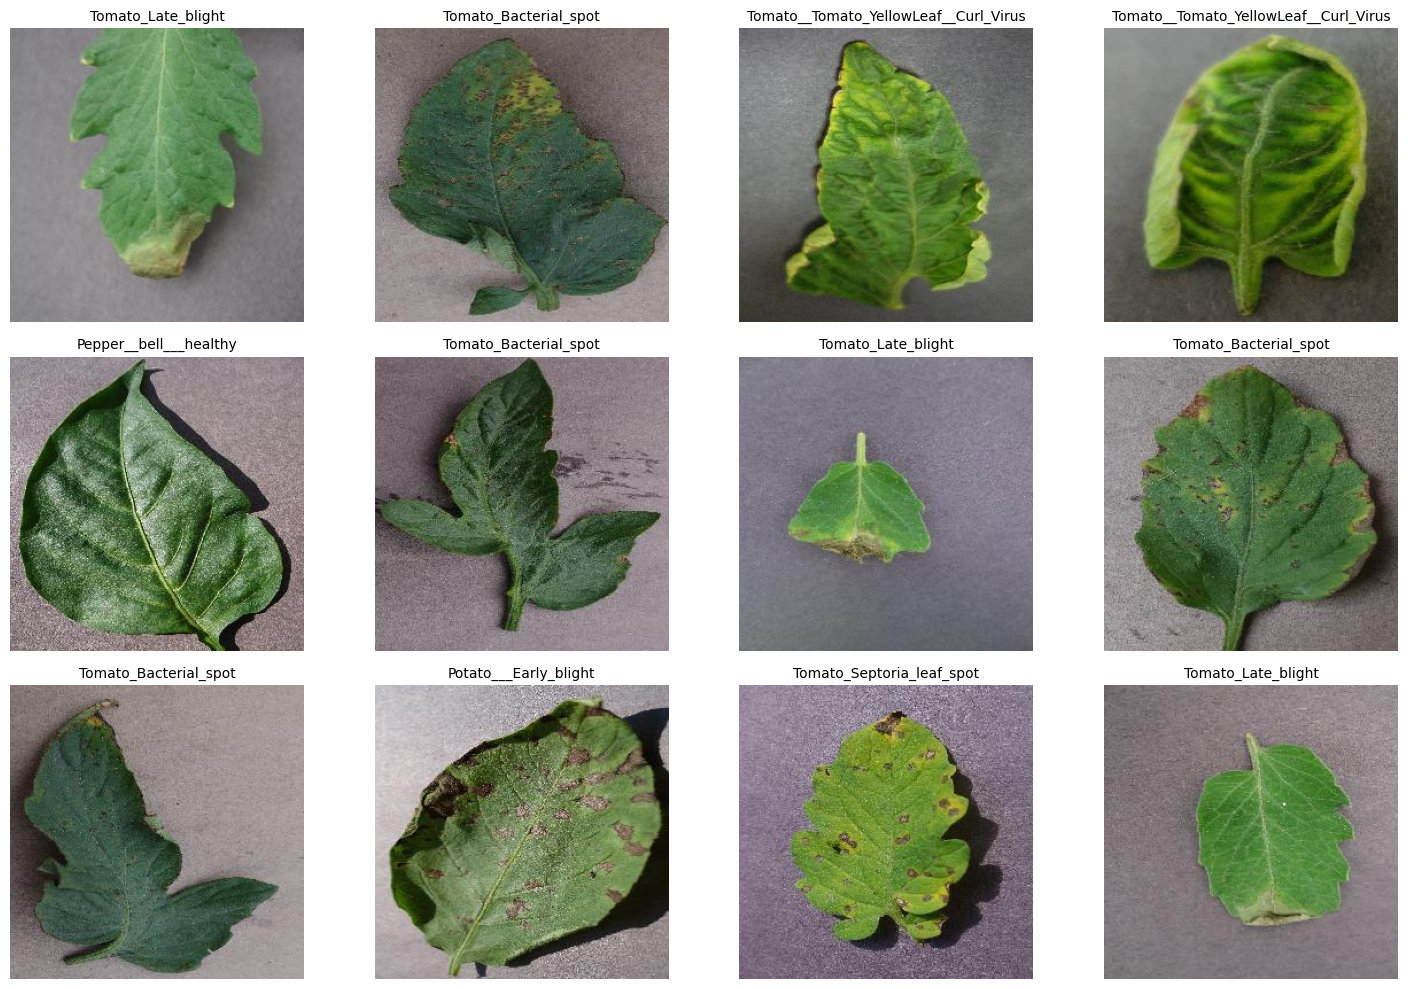

In [17]:
import random

random_rows = data.sample(n=12).reset_index(drop=True)

rows, cols = 3, 4
plt.figure(figsize=(15, 10))

for i in range(len(random_rows)):
    
    path = random_rows.loc[i, 'file_paths']
    label = random_rows.loc[i, 'labels']  
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label, fontsize=10)

plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

train_paths, test_paths, train_labels, test_labels = train_test_split(
    data['file_paths'],
    data['labels'],
    test_size=0.25,
    stratify=data['labels'],
    random_state=42
)

In [19]:
print(train_paths.size)
print(test_paths.size)


15479
5160


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')


2025-08-05 11:15:38.060421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754392538.079986     393 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754392538.086794     393 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
train_df = pd.DataFrame({
    'filename': train_paths,
    'class': train_labels
})

test_df = pd.DataFrame({
    'filename': test_paths,
    'class': test_labels
})

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


In [23]:
train_agumentation = train_datagen.flow_from_dataframe(
    train_df,
    x_col = 'filename',
    y_col = 'class',
    target_size = (256, 256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True
)

Found 15479 validated image filenames belonging to 15 classes.


In [24]:
test_agumentation = test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'filename',
    y_col = 'class',
    target_size = (256, 256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 5159 validated image filenames belonging to 15 classes.


## Using EfficientNetB3


In [25]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization , Flatten , Activation


In [26]:
base_model = EfficientNetB3(include_top=False,
    weights='imagenet',
    input_shape=(256 , 256 , 3),
    pooling="max"
    )
for i,layer in enumerate(base_model.layers):
    if i in range (320,386):
        layer.trainable = True
    else:
        layer.trainable = False

I0000 00:00:1754392552.767643     393 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754392552.768303     393 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [27]:
len(base_model.layers)


386

In [28]:
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization , Flatten,Conv2D , MaxPool2D , Input
from tensorflow.keras.models import Sequential

In [29]:

model = Sequential([
    Input(shape = (256 , 256 , 3)),
    Conv2D(32 , (3,3) , strides = (1,1) , padding = "same" , activation = "relu"),
    MaxPool2D(pool_size = (2,2) , strides = (2,2)),
    Conv2D(64 , (3,3) , strides = (1,1) , padding = "same" , activation = "relu"),
    MaxPool2D(pool_size = (2,2) , strides = (2,2)),
    Conv2D(128 , (3,3) , strides = (1,1) , padding = "same" , activation = "relu"),
    MaxPool2D(pool_size = (2,2) , strides = (2,2)),
    MaxPool2D(pool_size = (2,2) , strides = (2,2)),
    Flatten(),
    Dense(128 , activation = "relu"),
    Dropout(0.2),
    Dense(64 , activation = "relu"),
    BatchNormalization(),
    Dense(15 , activation = "softmax")
])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,297,167 (16.39 MB)

 Trainable params: 4,297,039 (16.39 MB)

 Non-trainable params: 128 (512.00 B)

In [31]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = "val_accuracy" ,
    patience = 4 ,
    restore_best_weights = True)


In [34]:
model.fit(
    train_agumentation,
    epochs = 20,
    batch_size = 32 ,
    validation_data = test_agumentation,
    callbacks = [early_stopping]
)

Epoch 1/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 260s 537ms/step - accuracy: 0.6763 - loss: 0.9803 - val_accuracy: 0.7550 - val_loss: 0.7384
Epoch 3/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 263s 542ms/step - accuracy: 0.8452 - loss: 0.4740 - val_accuracy: 0.8641 - val_loss: 0.4188
Epoch 7/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 267s 551ms/step - accuracy: 0.8554 - loss: 0.4340 - val_accuracy: 0.8354 - val_loss: 0.5509
Epoch 8/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 260s 536ms/step - accuracy: 0.8707 - loss: 0.3835 - val_accuracy: 0.9135 - val_loss: 0.2676
Epoch 9/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 260s 537ms/step - accuracy: 0.8690 - loss: 0.3923 - val_accuracy: 0.8182 - val_loss: 0.6513
Epoch 10/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 264s 545ms/step - accuracy: 0.8786 - loss: 0.3625 - val_accuracy: 0.9353 - val_loss: 0.2036
Epoch 11/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 264s 545ms/step - accuracy: 0.8898 - loss: 0.3246 - val_accuracy: 0.9209 - val_loss: 0.2362
Epoch 12/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 260s 537ms/step - accuracy: 0.900

In [36]:
test_loss , test_accuracy = model.evaluate(test_agumentation)
print(test_loss)
print("-------------")
print(test_accuracy)

162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9501 - loss: 0.1402
0.14370493590831757
-------------
0.9505718350410461


In [37]:
predictions = model.predict(test_agumentation)


162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step


In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [39]:
predicted_labels = np.argmax(predictions, axis=1)
print(f"Classification Report:\n{classification_report(test_agumentation.classes, predicted_labels)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       249
           1       0.97      0.99      0.98       370
           2       0.92      1.00      0.96       250
           3       0.97      0.94      0.95       250
           4       1.00      0.82      0.90        38
           5       0.95      0.96      0.96       532
           6       0.88      0.92      0.90       250
           7       0.95      0.97      0.96       477
           8       1.00      0.91      0.95       238
           9       0.97      0.91      0.94       443
          10       0.85      0.97      0.91       419
          11       0.99      0.75      0.85       351
          12       0.97      1.00      0.98       801
          13       0.98      0.98      0.98        93
          14       0.96      1.00      0.98       398

    accuracy                           0.95      5159
   macro avg       0.96      0.94      0.95      5159
wei

In [40]:
predicted_labels = np.argmax(predictions, axis=1)
print(f"Confusion Matrix:\n{confusion_matrix(test_agumentation.classes, predicted_labels)}")

Confusion Matrix:
[[241   2   1   0   0   0   2   0   0   3   0   0   0   0   0]
 [  1 368   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0 250   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 234   0   2   5   8   0   1   0   0   0   0   0]
 [  0   6   0   0  31   0   0   0   0   0   1   0   0   0   0]
 [  0   0   1   1   0 510   2   0   0   0   0   2  16   0   0]
 [  0   0   6   0   0   5 230   6   0   1   0   0   1   0   1]
 [  0   1   1   3   0   5   2 465   0   0   0   0   0   0   0]
 [  0   1   0   0   0   2   3   7 216   1   2   0   6   0   0]
 [  4   1  12   2   0   7  11   2   1 401   1   0   0   1   0]
 [  0   0   0   0   0   0   1   0   0   0 408   2   3   1   4]
 [  0   0   0   1   0   3   4   1   0   5  62 264   0   0  11]
 [  0   0   0   0   0   2   0   0   0   0   2   0 797   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0  91   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 398]]


In [41]:
predicted_labels = np.argmax(predictions, axis=1)
print(f"Accuracy: {accuracy_score(test_agumentation.classes, predicted_labels)}")

Accuracy: 0.950571816243458


In [42]:
model.save('efficientnetb3_model.keras')